In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('export kab/Bengkalis.csv')
del data['Unnamed: 0']
del data['Provinsi']
del data['Kecamatan']
data.head()

,Lintang (deg),Bujur (deg),Tanggal (dd/mm/yyy),Tingkat Kepercayaan (%),Kabupaten
0,1.135818,101.620712,2014-08-04,56.0,Bengkalis
1,1.165034,101.948425,2014-08-04,30.0,Bengkalis
2,1.211236,100.950394,2014-08-04,47.0,Bengkalis
3,3.787562,117.442612,2014-08-04,60.0,Bengkalis
4,1.135820,101.620728,2014-08-04,56.0,Bengkalis


In [45]:
# data['Tanggal (dd/mm/yyy)'] = pd.to_datetime(data['Tanggal (dd/mm/yyy)'])
data.dtypes

Lintang (deg)              float64
Bujur (deg)                float64
Tanggal (dd/mm/yyy)         object
Tingkat Kepercayaan (%)    float64
Kabupaten                   object
dtype: object

In [56]:
# del data['Tanggal (dd/mm/yyy)']
# del data['Kabupaten']
min_max_scaler = preprocessing.MinMaxScaler()
x = data.values
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=['Lintang', 'Bujur', 'Kepercayaan'])
df.shape

(8597, 3)

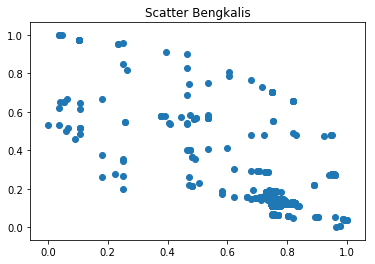

In [63]:
plt.title('Scatter Bengkalis')
plt.scatter(df['Lintang'],df['Bujur'])

In [1]:
kmean = KMeans(n_clusters = 18)
kmean.fit(df)
df['label'] = kmean.labels_
center = kmean.cluster_centers_
# df.head()

x = df['Lintang']
y = df['Bujur']
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=df['label'],s=50)
# for i,j in center:
#     ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.show()

NameError: name 'KMeans' is not defined